# Fraud Detection Dengan Menggunakan Teknik Klasifikasi

Pada kesempatan kali ini kita akan mempelajari tentang klasifikasi. Klasifikasi adalah teknik dalam data science untuk menentukan label pada sebuah data. Mesin akan belajar berdasarkan data-data yang sudah dilabeli terlebih dahulu. Oleh karena itu, teknik ini termasuk dalam kategori Supervised Learning.

Dataset Fraud Detection dapat diambil dari [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).<br>
Ada beberapa tantangan yang akan kita hadapi nanti, yaitu:
1. Data yang imbalanced. Secara umum, kemungkinan orang melakukan fraud pastilah sangat kecil. Oleh karena itu, jika kita tidak membuat strategi yang cukup baik dalam menghadapi data yang tidak seimbang ini, mesin akan menghasilkan model yang bias, atau yang biasa disebut dengan overfit.
2. Pemilihan fitur. Untuk data yang mempunyai ukuran cukup besar, pemilihan fitur harus dilakukan. Hal ini cukup penting karena ada beberapa fitur yang mungkin tidak mempunyai pengaruh besar untuk modelling, sehingga bisa kita buang demi waktu komputasi yang lebih efisien.
3. Mengetahui outliers pada dataset. Outliers adalah kumpulan dari beberapa data yang tidak mewakili dari pola persebaran data. Hal ini harus kita siasati agar mesin tidak salah dalam mempelajari dataset, sehingga model kita bisa lebih berkualitas.

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:


df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#check null values
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#check how many frauds and how many are not
print ('no frauds', round(df['Class'].value_counts()[0]/len(df)* 100,2), '% of the dataset')
print ('frauds', round(df['Class'].value_counts()[1]/len(df)* 100,2), '% of the dataset')

no frauds 99.83 % of the dataset
frauds 0.17 % of the dataset


### Dapat kita lihat bahwa dataset kita mempunyai proporsi yang tidak seimbang. jika kita langsung melakukan algoritma machine learning pada dataset ini, kita akan mendapatkan model yang overfit.


Text(0.5,1,'Class distribution \n (0= No Fraud || 1 = Fraud)')

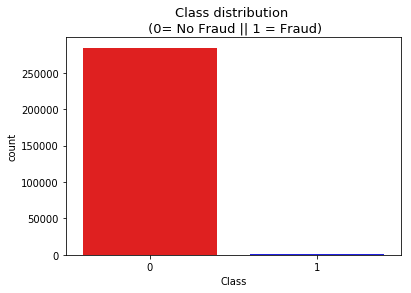

In [7]:
colors = ['red', 'blue']

sns.countplot('Class', data=df, palette=colors)
plt.title('Class distribution \n (0= No Fraud || 1 = Fraud)', fontsize = 13)

(0.0, 172792.0)

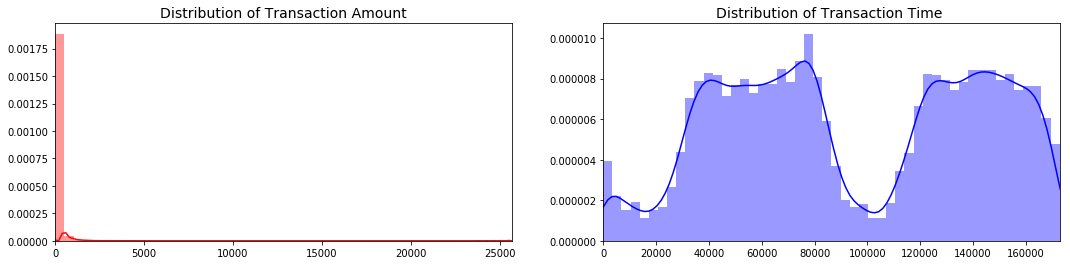

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val= df['Amount'].values
time_val= df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time ', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


In [9]:
#scale the time and amount so they can be the same value as other variable
from sklearn.preprocessing import StandardScaler, RobustScaler
#Robust Scaler is less prone to outliers
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [11]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
# before we try random undersampling technique, we need to separate original dataframe. 
# So we can test our model later in our original dataframe,
# not test it on original testing set(sub sample set)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print ('no frauds', round(df['Class'].value_counts()[0]/len(df)* 100,2), '% of the dataset')
print ('frauds', round(df['Class'].value_counts()[1]/len(df)* 100,2), '% of the dataset')

X = df.drop('Class', axis = 1)
y = df['Class']

sss= StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X,y):
    print ("Train", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
#check the distribution of the labels

#turn into array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#see if both the train and test label distribution are similiarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)
print ( "-" * 100)

print('Label Distribution: \n')
print (train_counts_label / len(original_ytrain))
print (test_counts_label / len(original_ytest))




no frauds 99.83 % of the dataset
frauds 0.17 % of the dataset
Train [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
----------------------------------------------------------------------------------------------------
Label Distribution: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [13]:
#now it's time to remove some data so we can have balance dataset  and thus avoiding our models to overfitting
#after make it with 50-50 ratio, we need to shuffle the data  so our models can maintain the accuracy.
# the minus of this technique is because we removed some big information, it might not perform as accurate as if we run with original dataset

#shuffle data before creating subsamples
df = df.sample(frac = 1)

#make same amount of data
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#shuffle again
new_df = normal_distributed_df.sample(frac = 1, random_state = 42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
210854,-0.201635,0.628027,1.994610,0.704675,-1.484322,3.597986,1.241638,0.206128,0.567732,-0.207305,...,-0.219097,0.243867,0.825391,-0.096149,0.310616,0.519973,0.288321,-0.060106,-0.060298,0
64411,1.089779,-0.394236,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,...,0.847085,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,1
170333,1.089220,0.416335,-1.523069,1.416380,-1.703893,-0.831193,-0.425808,-0.914387,0.265370,1.015852,...,-0.386454,-0.094728,-0.394760,-0.045002,0.668114,0.154885,-0.139190,-0.066955,-0.245315,0
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
150677,0.116118,0.107931,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,...,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


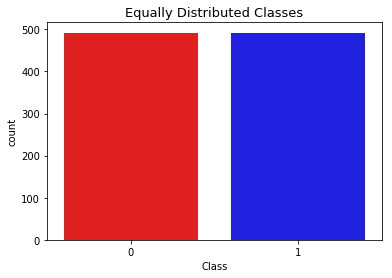

In [14]:
#analyze the data and data preprocessing

print ('Distribution of the Classes in the subsample dataset')
print ( new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data = new_df, palette = colors)
plt.title('Equally Distributed Classes', fontsize = 13)
plt.show()

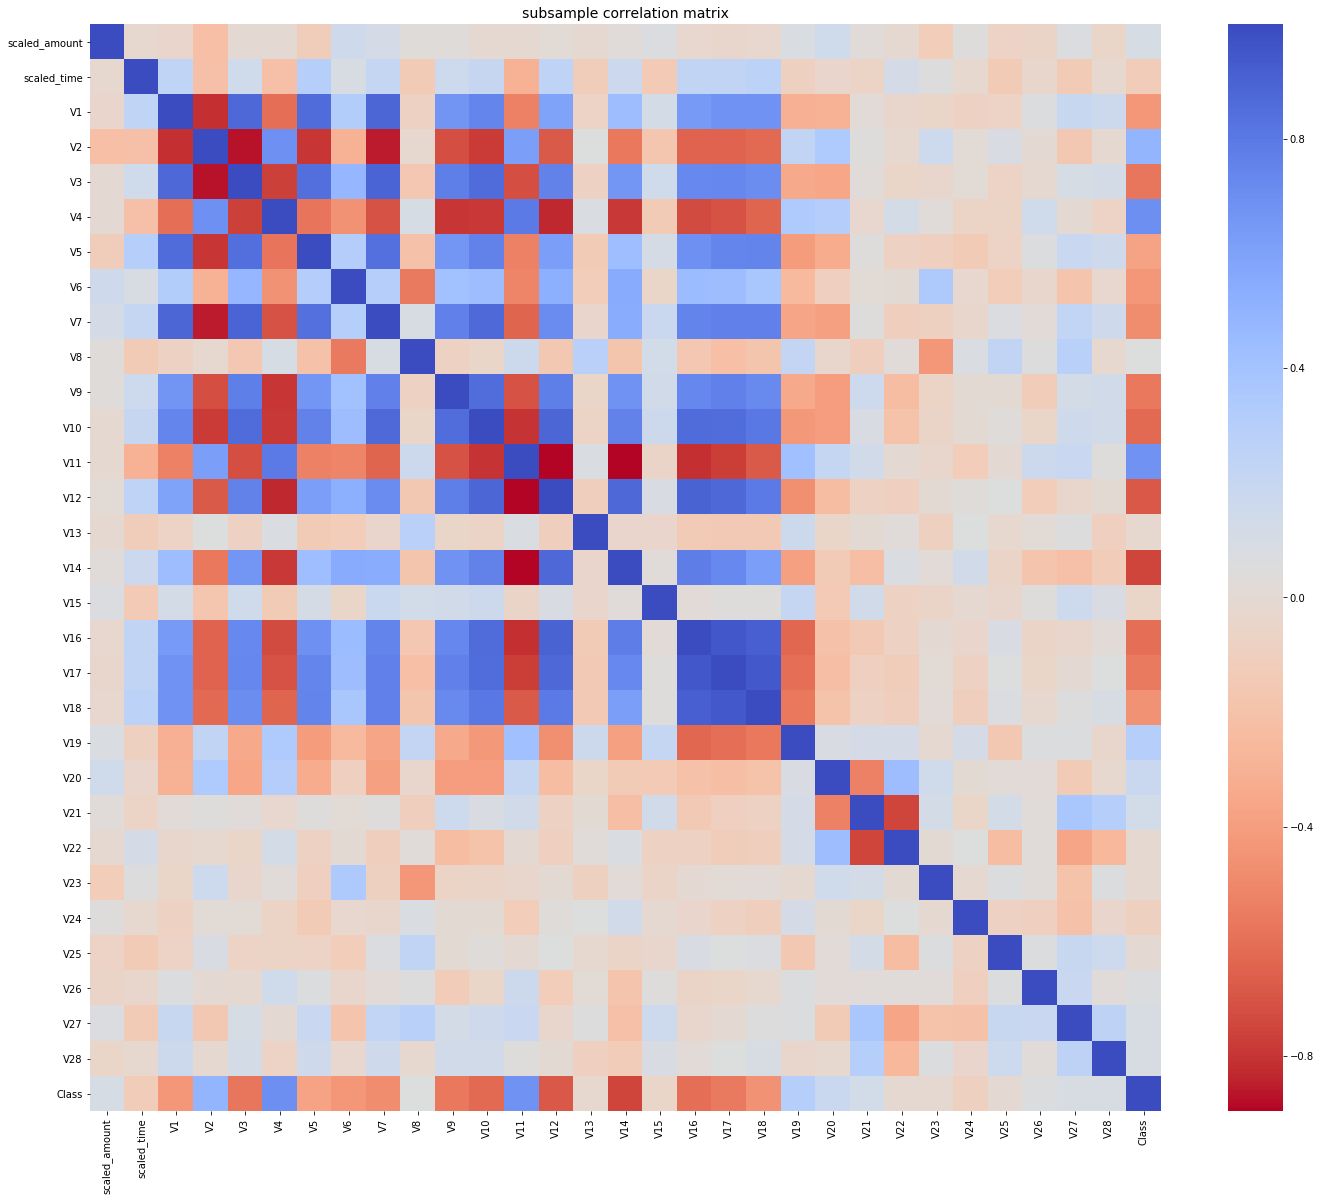

In [15]:
#make sure that our subsample do not contain high imbalance class in our models

f, (ax1) = plt.subplots(1, figsize = (24,20))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws= {'size':20}, ax=ax1)
ax1.set_title("subsample correlation matrix", fontsize = 14)
plt.show()

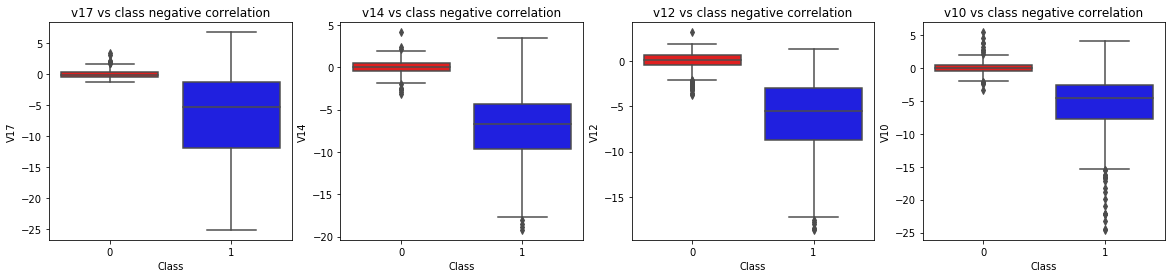

In [16]:
# negative corellation with our class. the lower our feature value, more likely  it will be fraud transaction

f, axes = plt.subplots(ncols = 4, figsize=(20,4))

sns.boxplot(x="Class", y = "V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('v17 vs class negative correlation')

sns.boxplot(x="Class", y = "V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('v14 vs class negative correlation')

sns.boxplot(x="Class", y = "V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('v12 vs class negative correlation')

sns.boxplot(x="Class", y = "V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('v10 vs class negative correlation')

plt.show()



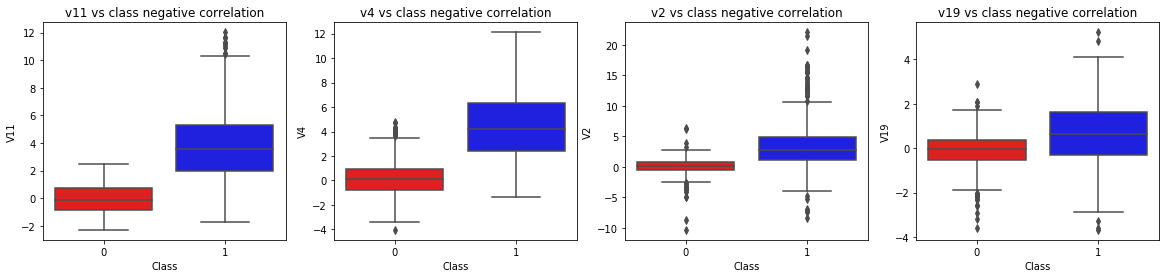

In [17]:
# positive corellation with our class. the higher our feature value, more likely  it will be fraud transaction

f, axes = plt.subplots(ncols = 4, figsize=(20,4))

sns.boxplot(x="Class", y = "V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('v11 vs class negative correlation')

sns.boxplot(x="Class", y = "V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('v4 vs class negative correlation')

sns.boxplot(x="Class", y = "V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('v2 vs class negative correlation')

sns.boxplot(x="Class", y = "V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('v19 vs class negative correlation')

plt.show()

### Plot-plot yang telah kita buat bertujuan untuk mengetahui outliers yang akan kita buang. 

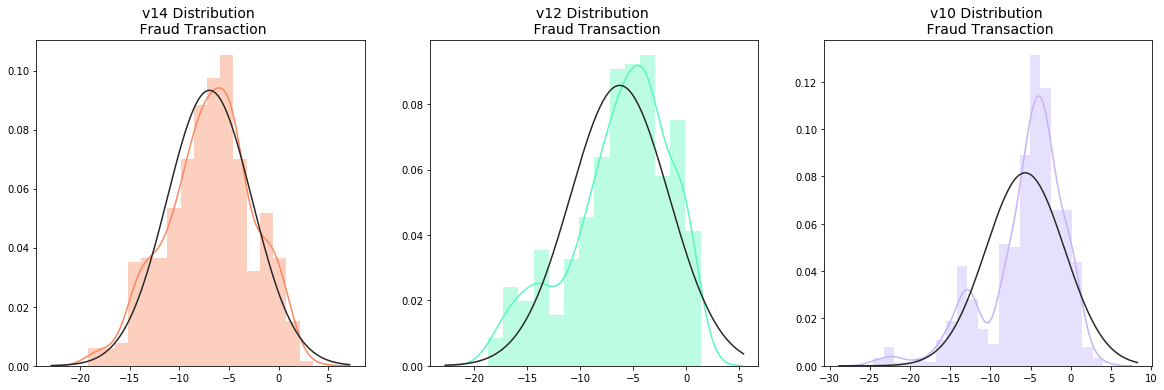

In [18]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax = ax1, fit = norm, color = '#FB8861')
ax1.set_title('v14 Distribution \n Fraud Transaction', fontsize = 14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax = ax2, fit = norm, color = '#56F9BB')
ax2.set_title('v12 Distribution \n Fraud Transaction', fontsize = 14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax = ax3, fit = norm, color = '#C5B3F9')
ax3.set_title('v10 Distribution \n Fraud Transaction', fontsize = 14)

plt.show()

In [19]:
# removing v14 outliers = the HIGHEST negative Correlated with the labels

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print ('Quartile 25:{} | Quartile 75:{}'.format(q25, 75))
v14_iqr = q75-q25
print ('iqr:{}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print ('Cutoff:{}'.format(v14_cut_off))
print ('v14 Lower:{}'.format(v14_lower))
print ('v14 Upper:{}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print ('Feature V14 Outliers for fraud Case:{}'.format(len(outliers)))
print("v14 Outliers:{}".format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] < v14_upper) & (new_df['V14'] < v14_lower )].index)
print ('---'*44)

#removing v12 outliers

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print ('Quartile 25:{} | Quartile 75:{}'.format(q25, 75))
v12_iqr = q75-q25
print ('iqr:{}'.format(v12_iqr))

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print ('Cutoff:{}'.format(v12_cut_off))
print ('v12 Lower:{}'.format(v12_lower))
print ('v12 Upper:{}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print ('Feature V12 Outliers for fraud Case:{}'.format(len(outliers)))
print("v12 Outliers:{}".format(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] < v12_upper) & (new_df['V12'] < v12_lower )].index)
print ('---'*44)

#removing v10 outliers

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print ('Quartile 25:{} | Quartile 75:{}'.format(q25, 75))
v10_iqr = q75-q25
print ('iqr:{}'.format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print ('Cutoff:{}'.format(v12_cut_off))
print ('v10 Lower:{}'.format(v10_lower))
print ('v10 Upper:{}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print ('Feature V10 Outliers for fraud Case:{}'.format(len(outliers)))
print("v10 Outliers:{}".format(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] < v10_upper) & (new_df['V10'] < v10_lower )].index)
print ('---'*44)

Quartile 25:-9.692722964972385 | Quartile 75:75
iqr:5.409902115485519
Cutoff:8.114853173228278
v14 Lower:-17.807576138200663
v14 Upper:3.8320323237414122
Feature V14 Outliers for fraud Case:4
v14 Outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
------------------------------------------------------------------------------------------------------------------------------------
Quartile 25:-8.67303320439115 | Quartile 75:75
iqr:5.780002635714835
Cutoff:8.670003953572252
v12 Lower:-17.3430371579634
v12 Upper:5.776973384895937
Feature V12 Outliers for fraud Case:4
v12 Outliers:[-18.4311310279993, -18.553697009645802, -18.683714633344298, -18.047596570821604]
------------------------------------------------------------------------------------------------------------------------------------
Quartile 25:-7.466658535821848 | Quartile 75:75
iqr:4.954797397665596
Cutoff:8.670003953572252
v10 Lower:-14.89885463232024
v10 Upper:4.920334958342141
Feature V10 Ou

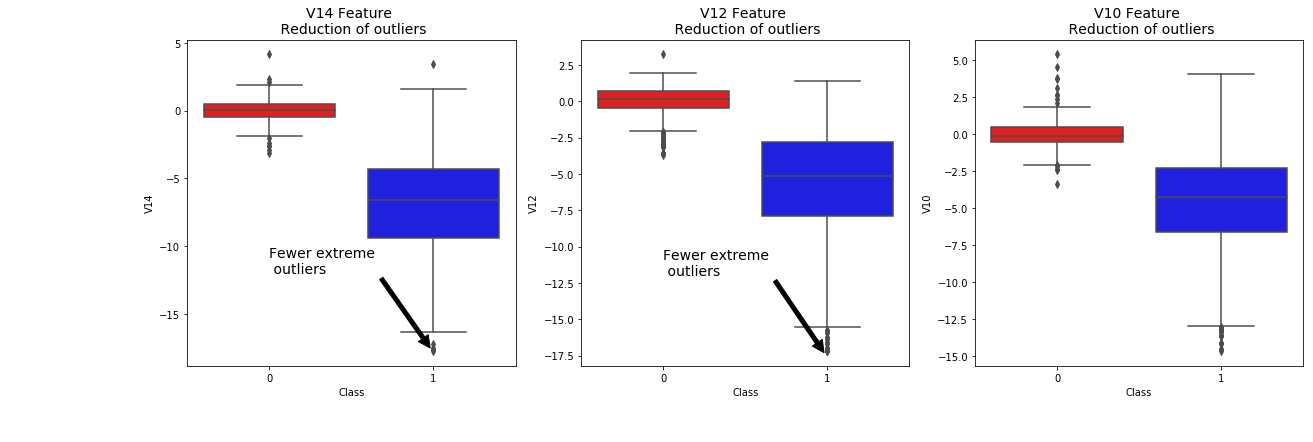

In [20]:
#checking our feature again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Class', y ='V14', data = new_df, ax = ax1, palette = colors)
ax1.set_title('V14 Feature \n Reduction of outliers', fontsize = 14)
ax1.annotate('Fewer extreme \n outliers', xy = (0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()



In [21]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
210854,-0.201635,0.628027,1.994610,0.704675,-1.484322,3.597986,1.241638,0.206128,0.567732,-0.207305,...,-0.219097,0.243867,0.825391,-0.096149,0.310616,0.519973,0.288321,-0.060106,-0.060298,0
64411,1.089779,-0.394236,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,...,0.847085,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,1
170333,1.089220,0.416335,-1.523069,1.416380,-1.703893,-0.831193,-0.425808,-0.914387,0.265370,1.015852,...,-0.386454,-0.094728,-0.394760,-0.045002,0.668114,0.154885,-0.139190,-0.066955,-0.245315,0
42549,0.925452,-0.511578,-5.314173,4.145944,-8.532522,8.344392,-5.718008,-3.043536,-10.989185,3.404129,...,1.150017,2.331466,0.862996,-0.614453,0.523648,-0.712593,0.324638,2.245091,0.497321,1
150677,0.116118,0.107931,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,...,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1


In [22]:
print('hello')

hello


In [23]:
#implement Clustering methods from random undersample data
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

#PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

#Truncated SVD 
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.7e+01 s
PCA took 0.91 s
Truncated SVD took 0.002 s


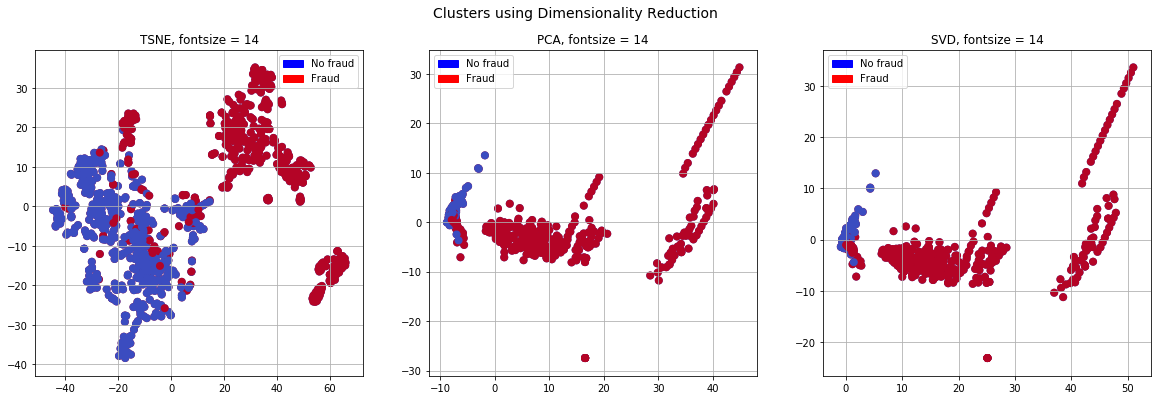

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize = 14)

blue_patch = mpatches.Patch(color = 'blue', label = 'No fraud')
red_patch = mpatches.Patch(color = 'red', label= 'Fraud')

# T-SNE Scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap="coolwarm", label = 'No fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap="coolwarm", label = 'Fraud', linewidths=2)
ax1.set_title('TSNE, fontsize = 14')
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

#PCA Scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap="coolwarm", label = 'No fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap="coolwarm", label = 'Fraud', linewidths=2)
ax2.set_title('PCA, fontsize = 14')
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

#TruncatedSVD Scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap="coolwarm", label = 'No fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap="coolwarm", label = 'Fraud', linewidths=2)
ax3.set_title('SVD, fontsize = 14')
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### Sekarang kita akan menentukan teknik klasifikasi yang terbaik, dengan menggunakan Grid Search pada masing-masing algoritma. Grid Search adalah teknik untuk menentukan parameter terbaik dalam sebuah algoritma machine learning


### Semakin luas perbedaan skor antara training dan cross-validation, maka semakin besar kemungkinan model yang kita dapat mempunyai sifat overfitting.

In [25]:
#Undersampling before cross validating
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [26]:
#Our data is scaled. we should split our training and test data.
from sklearn.model_selection import train_test_split

#for undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
#Turn value into array for Classifiers Algorithm
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [28]:
#Implement Simple Classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
    
}

In [29]:
#applying cross validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print('Classifiers:', classifier.__class__.__name__, 'Has Training Score of', round(training_score.mean(), 2)*100, "%Accuracy Score")

Classifiers: LogisticRegression Has Training Score of 93.0 %Accuracy Score
Classifiers: KNeighborsClassifier Has Training Score of 92.0 %Accuracy Score
Classifiers: SVC Has Training Score of 93.0 %Accuracy Score
Classifiers: DecisionTreeClassifier Has Training Score of 90.0 %Accuracy Score


In [30]:
#use GridSearch to find the best parameter
from sklearn.model_selection import GridSearchCV

#Logistic Regression
log_reg_params= {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

#KNearest
knears_params= {'n_neighbors': list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

#SVC
svc_params={'C':[0.5, 0.7, 0.9, 1], 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

#DecisionTree Classifier
tree_params = {'criterion':['gini', 'entropy'], 'max_depth': list(range(2,4,1)), 'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [31]:
#check if theres Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  94.07%
Knears Neighbors Cross Validation Score 92.49%
Support Vector Classifier Cross Validation Score 92.88%
DecisionTree Classifier Cross Validation Score 92.62%


In [32]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss('majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [265496 180252  42635 ...  29027  13737  17629] Test: [262995  11352 147252 ... 274527 269810  64123]
Train: [ 72186 114248  16776 ... 264444 191869 284016] Test: [202593  32944 128088 ... 243993 127632  48269]
Train: [ 20849 114590 167613 ... 244471 178917 218470] Test: [284351  82434  90934 ... 171163 168738 271597]
Train: [122218 181608 194353 ... 104590 277584  29400] Test: [225643  63302  67983 ... 279453  77510  76004]
Train: [241657 223435 136900 ...  86446 160475  49586] Test: [157481 204812  83709 ... 251448 178912 216809]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [33]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

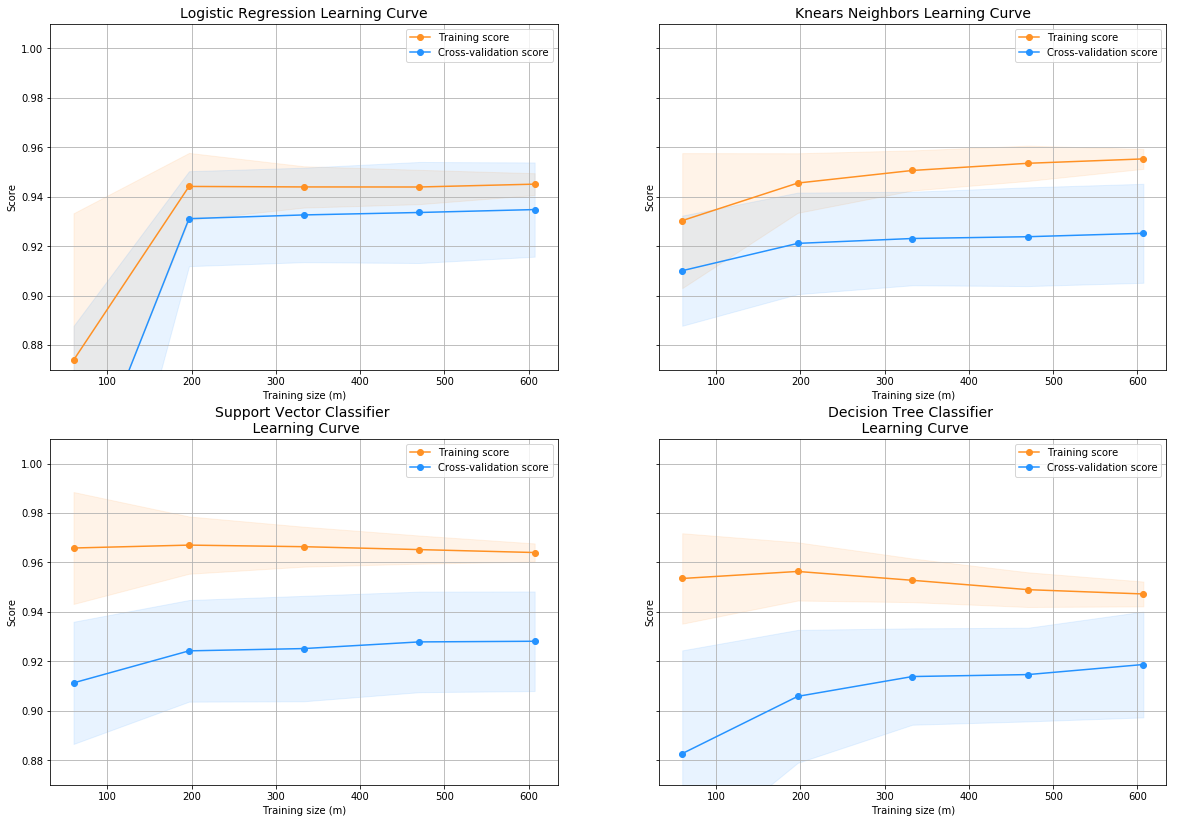

In [34]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

In [35]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [36]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9728113483067937
KNears Neighbors:  0.9225227731034004
Support Vector Classifier:  0.9633196578819275
Decision Tree Classifier:  0.9256658090536124


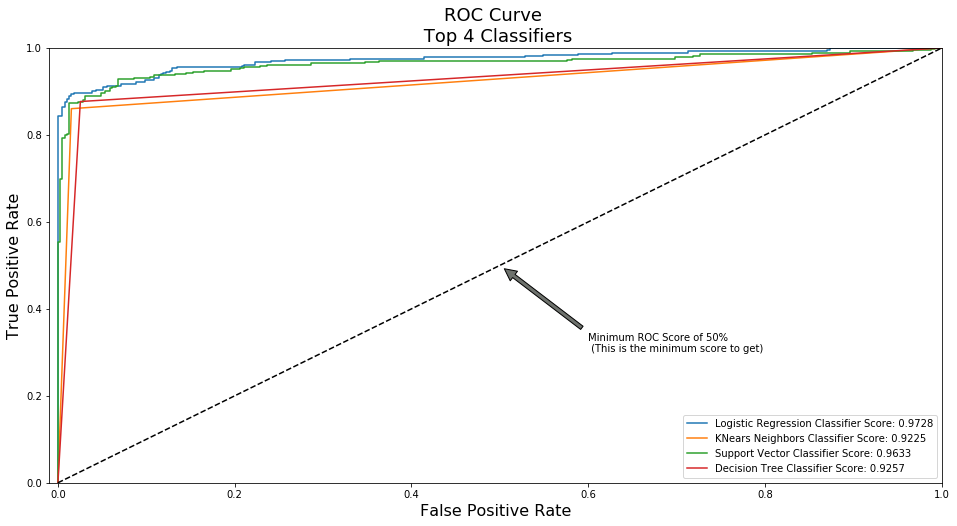

In [37]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

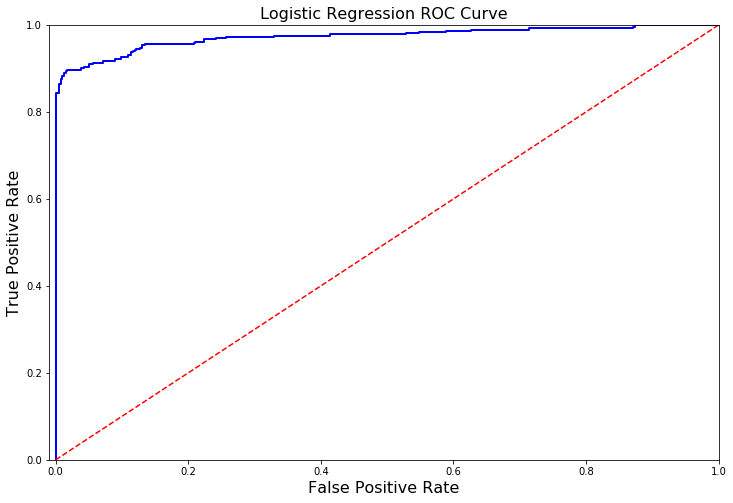

In [38]:
#Analyze the best Classification Model
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [40]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.89
Precision Score: 0.73
F1 Score: 0.80
Accuracy Score: 0.79
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.74
Precision Score: 0.01
Recall Score: 0.89
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [41]:
undersample_y_score = log_reg.decision_function(original_Xtest)

from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.03


Text(0.5,1,'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.03')

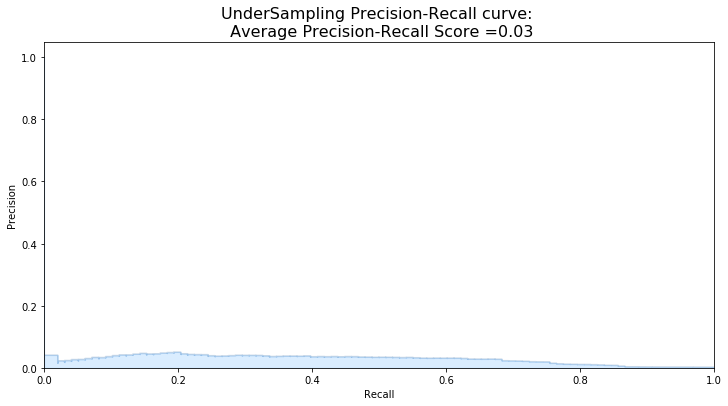

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

### Selanjutnya kita akan melakukan implementasi SMOTE pada dataset kita. SMOTE adalah teknik untuk menangani overfit pada sebuah dataset. SMOTE akan membuat data-data point yang baru dari kelas minoritas sehingga dataset mempunyai proporsi label yang seimbang

### SMOTE akan membuat data point berdasarkan jarak yang terdekat dari data point kelas minoritas


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE('minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9780420900173363
precision: 0.06527818440117747
recall: 0.8759493670886076
f1: 0.12149727609219259
---------------------------------------------------------------------------------------------------------------------------------------


In [48]:
    pipeline = imbalanced_make_pipeline(SMOTE('minoasdasdasdasdasrity'), rand_log_reg)

In [51]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

             precision    recall  f1-score   support

   No Fraud       1.00      0.98      0.99     56864
      Fraud       0.06      0.90      0.12        98

avg / total       1.00      0.98      0.99     56962



In [52]:
y_score = best_est.decision_function(original_Xtest)

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


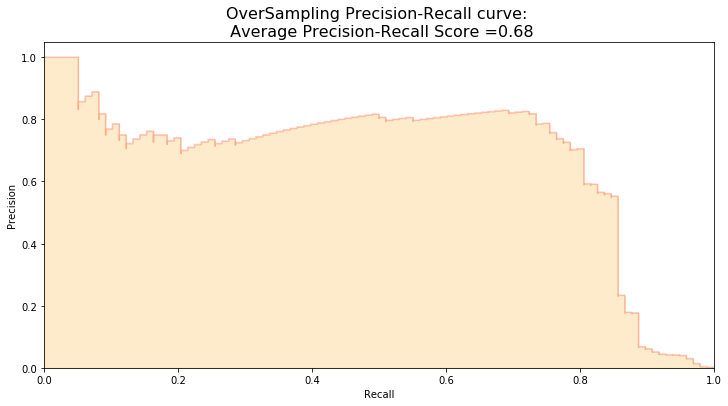

In [55]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()

In [56]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [57]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :11.30864667892456 sec


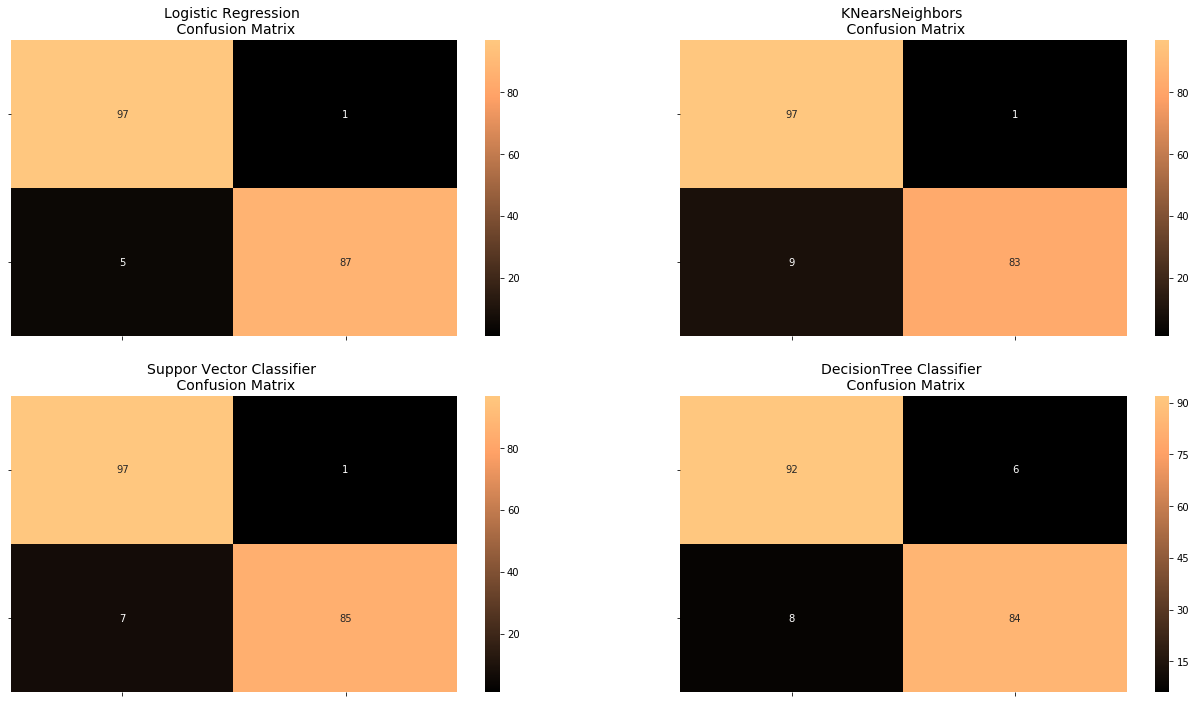

In [58]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [59]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97        98
          1       0.99      0.95      0.97        92

avg / total       0.97      0.97      0.97       190

KNears Neighbors:
             precision    recall  f1-score   support

          0       0.92      0.99      0.95        98
          1       0.99      0.90      0.94        92

avg / total       0.95      0.95      0.95       190

Support Vector Classifier:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96        98
          1       0.99      0.92      0.96        92

avg / total       0.96      0.96      0.96       190

Decision Tree:
             precision    recall  f1-score   support

          0       0.92      0.94      0.93        98
          1       0.93      0.91      0.92        92

avg / total       0.93      0.93      0.93       190



In [65]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.968421
1,Oversampling (SMOTE),0.976686


## Implementasi Keras terhadap Data Undersampling


In [66]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [67]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [68]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 607 samples, validate on 152 samples
Epoch 1/20
 - 1s - loss: 0.9836 - acc: 0.5470 - val_loss: 0.4834 - val_acc: 0.7763
Epoch 2/20
 - 0s - loss: 0.4101 - acc: 0.8303 - val_loss: 0.3407 - val_acc: 0.8816
Epoch 3/20
 - 0s - loss: 0.3083 - acc: 0.9110 - val_loss: 0.2631 - val_acc: 0.9408
Epoch 4/20
 - 0s - loss: 0.2540 - acc: 0.9242 - val_loss: 0.2192 - val_acc: 0.9408
Epoch 5/20
 - 0s - loss: 0.2205 - acc: 0.9308 - val_loss: 0.1929 - val_acc: 0.9539
Epoch 6/20
 - 0s - loss: 0.1968 - acc: 0.9325 - val_loss: 0.1750 - val_acc: 0.9539
Epoch 7/20
 - 0s - loss: 0.1808 - acc: 0.9357 - val_loss: 0.1653 - val_acc: 0.9539
Epoch 8/20
 - 0s - loss: 0.1665 - acc: 0.9390 - val_loss: 0.1583 - val_acc: 0.9539
Epoch 9/20
 - 0s - loss: 0.1576 - acc: 0.9390 - val_loss: 0.1562 - val_acc: 0.9474
Epoch 10/20
 - 0s - loss: 0.1501 - acc: 0.9407 - val_loss: 0.1544 - val_acc: 0.9408
Epoch 11/20
 - 0s - loss: 0.1424 - acc: 0.9473 - val_loss: 0.1514 - val_acc: 0.9342
Epoch 12/20
 - 0s - loss: 0.1358 - acc:

In [69]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)


In [70]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54569  2295]
 [    5    93]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


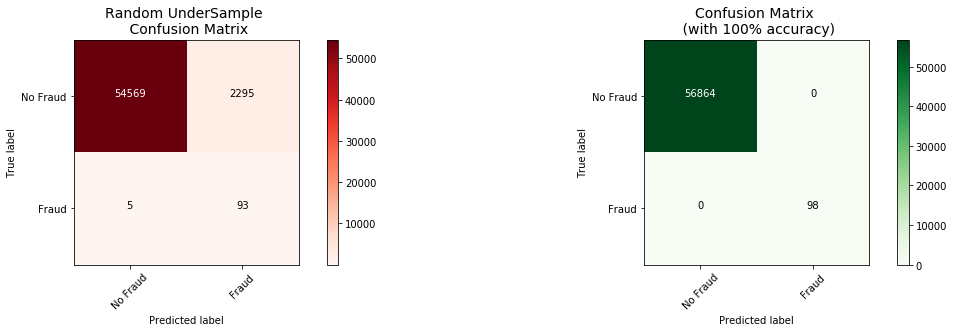

In [71]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## Implementasi Keras terhadap data Oversampling(SMOTE)

In [72]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [73]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363921 samples, validate on 90981 samples
Epoch 1/20
 - 3s - loss: 0.0755 - acc: 0.9730 - val_loss: 0.0271 - val_acc: 0.9926
Epoch 2/20
 - 2s - loss: 0.0163 - acc: 0.9961 - val_loss: 0.0123 - val_acc: 0.9992
Epoch 3/20
 - 2s - loss: 0.0086 - acc: 0.9983 - val_loss: 0.0047 - val_acc: 0.9998
Epoch 4/20
 - 3s - loss: 0.0053 - acc: 0.9990 - val_loss: 0.0040 - val_acc: 0.9998
Epoch 5/20
 - 2s - loss: 0.0040 - acc: 0.9992 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/20
 - 2s - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 7/20
 - 3s - loss: 0.0026 - acc: 0.9994 - val_loss: 7.1544e-04 - val_acc: 1.0000
Epoch 8/20
 - 2s - loss: 0.0023 - acc: 0.9995 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 9/20
 - 2s - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 10/20
 - 3s - loss: 0.0018 - acc: 0.9996 - val_loss: 3.1421e-04 - val_acc: 1.0000
Epoch 11/20
 - 3s - loss: 0.0017 - acc: 0.9996 - val_loss: 3.4688e-04 - val_acc: 1.0000
Epoch 12/20
 - 2s - lo

In [74]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[56825    39]
 [   20    78]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


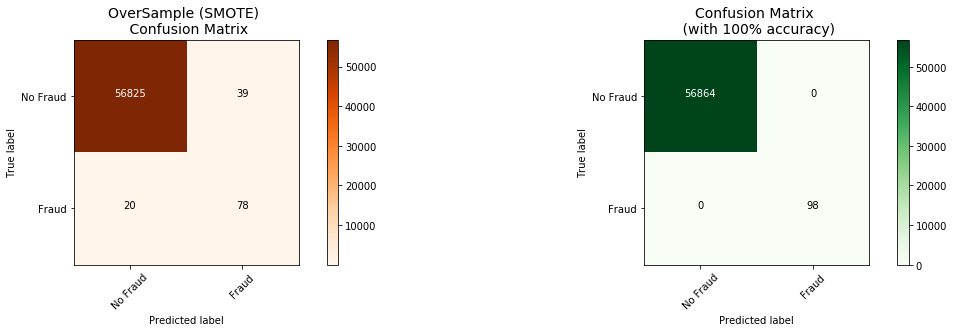

In [75]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## KESIMPULAN:
1. SMOTE bagus untuk membantu kita jika kita mempunyai data yang bersifat imbalanced.
2. banyak sekali model kita yang mempunyai prediksi yang salah dengan teknik undersampling, terutama dalam menentukan non-fraud
3. Kita harus membuang outliers juga sebelum kita melakukan modelling pada teknik oversampling, seperti yang kita lakukan juga dengan teknik undersampling.
